**Fekete, Bendegúz**

*Preregistration*: https://aspredicted.org/4254-qzj2.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import scipy as sp
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.oneway import anova_oneway
from matplotlib.ticker import MaxNLocator
from IPython.display import Markdown, display


# Import the data
d_long = pd.read_csv('d_long.csv')
d_wide = pd.read_csv('d_wide.csv')

# Create labels for Slavery: Type variable (based on Murdock & White, 1969)
labels_slavery = {
    1: 'Absent/Near Absent',
    2: 'Nonhereditary',
    3: 'Unidentified Type',
    4: 'Hereditary'
}

# Background & hypotheses

The rigidity of a social hierarchy might affect which traits help an individual succeed in their life by rewarding certain qualities, while punishing others. Since societies differ in their structure, differences could also be present in which traits they primarily teach children in hopes of raising successful, well-adapted adults. For example, rigid cultures might foster obedience and conformity, as opposed to more fluid cultures which encourage competitiveness.\
There are multiple ways to operationalize the rigidity of a social hierarchy. In this current project, the presence and type of slavery and the view of the ruler as divine were chosen as markers.\
Data regarding the **type and presence of slavery** in different societies was provided by the Standard Cross-Cultural Sample (SCCS) (Murdock & White, 1969). This dataset enables distinction between hereditary and nonhereditary types of slavery. Societies with hereditary slavery are assumed to be more rigid in their structure than societies with either nonhereditary or no slavery present at all, because a group of people are conserved in a role not influenced by their own actions.\
Data about the **view of the ruler as either divine or non-divine** was provided by Robert L. Carneiro's Dataset (6th Edition) (Carneiro, 2024). Societies which view their ruler as divine or sacred are assumed to attribute qualities to the ruling person not achievable by a non-leader member of the group.\
Information about the extent to which societies prioritize the **inculcation of certain traits** in children was provided by the Standard Cross-Cultural Sample (SCCS) (Murdock & White, 1969). The traits chosen for examination were: competitiveness, obedience and achievement.\
\
**Hypotheses:** In societies where status is determined by uncontrollable factors, ambition holds less significance, while social discipline becomes a greater focus in child-rearing.

- **1:** Achievement and competitiveness hold smaller significance in child-rearing in societies which view their ruler as (semi)divine.
- **2:** Achievement and competitiveness hold smaller significance in child-rearing in societies where hereditary slavery is present, than in those where either nonhereditary slavery is present or where no slavery is present at all.
    - Planned contrasts: hereditary vs. nonhereditary, nonhereditary vs. no slavery present.
- **3:** Obedience holds greater significance in child-rearing in societies which view their ruler as (semi)divine.
- **4:** Obedience holds greater significance in child-rearing in societies where hereditary slavery is present, than in those where either nonhereditary slavery is present or where no slavery is present at all.
    - Planned contrasts: hereditary vs. nonhereditary, nonhereditary vs. no slavery present.

# **Variables**

## *Traits inculcated in childhood*

In the SCCS, societies were scored on a scale from 1 to 10 based on the significance the inculcation of a certain trait holds in child-rearing (Barry et al. 1976). Separate scores were determined for gender groups (boys and girls) and for two stages of childhood (early and late). These variables can be seen in the table below.

In [3]:
# Create a table of variables representing traits inculcated in children
df_traits = d_long[d_long['title'].str.contains('Achievement|Competitiveness|Obedience')][['var_id', 'category', 'title']].drop_duplicates().sort_values(by='var_id')
display(Markdown(df_traits.to_markdown(index=False)))

| var_id   | category              | title                       |
|:---------|:----------------------|:----------------------------|
| SCCS302  | Childhood, Life cycle | Competitiveness: Early Boy  |
| SCCS303  | Childhood, Life cycle | Competitiveness: Early Girl |
| SCCS304  | Childhood, Life cycle | Competitiveness: Late Boy   |
| SCCS305  | Childhood, Life cycle | Competitiveness: Late Girl  |
| SCCS310  | Childhood, Life cycle | Achievement: Early Boy      |
| SCCS311  | Childhood, Life cycle | Achievement: Early Girl     |
| SCCS312  | Childhood, Life cycle | Achievement: Late Boy       |
| SCCS313  | Childhood, Life cycle | Achievement: Late Girl      |
| SCCS322  | Childhood, Life cycle | Obedience: Early Boy        |
| SCCS323  | Childhood, Life cycle | Obedience: Early Girl       |
| SCCS324  | Childhood, Life cycle | Obedience: Late Boy         |
| SCCS325  | Childhood, Life cycle | Obedience: Late Girl        |

To reduce dimensions, I averaged data across genders and age groups, creating three continous variables: Average Achievement, Average Competitiveness and Average Obedience. Although notable differences exist among groups, this project focuses solely on differences in the overall mean.\
Below you can see descriptive statistics and histograms for the distrubution of the three variables.

In [4]:
# Create a table for descriptive statistics
# Select relevant columns and calculate descriptive statistics
stats = d_wide[['Achievement: Avg', 'Competitiveness: Avg', 'Obedience: Avg']].describe().T

# Add sample size (count of non-null values)
stats['sample_size'] = d_wide.count()

# Select and rename columns for clarity
stats = stats[['sample_size', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Round values for readability
stats = stats.round(2)

display(Markdown(stats.to_markdown()))

|                      |   sample_size |   mean |   std |   min |   25% |   50% |   75% |   max |
|:---------------------|--------------:|-------:|------:|------:|------:|------:|------:|------:|
| Achievement: Avg     |           164 |   4.54 |  1.45 |   1   |   3.5 |   4.5 |  5.75 |     8 |
| Competitiveness: Avg |           136 |   4.4  |  1.71 |   0   |   3   |   5   |  5.5  |     9 |
| Obedience: Avg       |           165 |   5.44 |  1.96 |   1.5 |   4   |   5   |  6.5  |    10 |

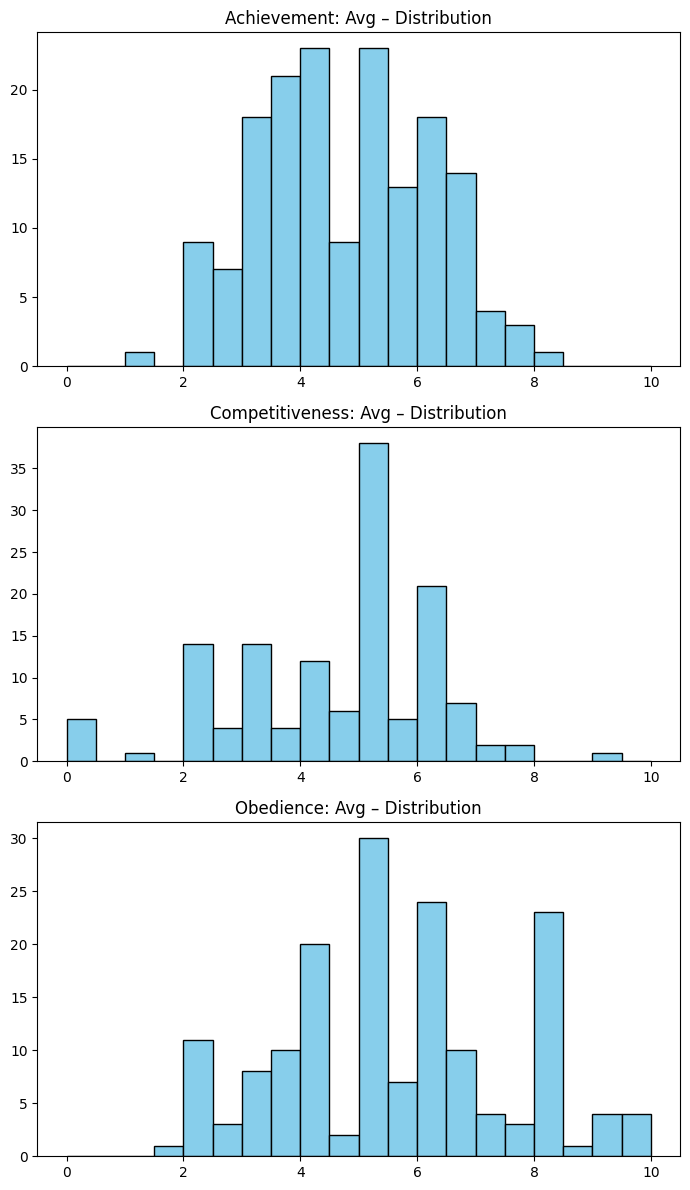

In [ ]:
# Create histograms for the distribution of the mean scores for each trait
# Titles for each variable
titles = ['Achievement: Avg – distribution', 'Competitiveness: Avg – distribution', 'Obedience: Avg – distribution']

# Columns to plot
cols = ['Achievement: Avg', 'Competitiveness: Avg', 'Obedience: Avg']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 12), sharex=False)
for i, (col, ax) in enumerate(zip(cols, axs)):
    ax.hist(d_wide[col], bins=20, color='skyblue', edgecolor='black', range=[0,10])
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

## *Rigidity of Social Hierarchy*

The variables denoting the view of the ruler as (semi)divine and the type and presence of slavery are both categorical.

In [6]:
# Create a table of variables representing the rigidity of the social hierarchy
df = d_long[d_long['title'].str.contains('Slavery|divine')][['var_id', 'category', 'title']].drop_duplicates().sort_values(by='var_id')
display(Markdown(df.to_markdown()))

|    | var_id       | category                         | title                                    |
|---:|:-------------|:---------------------------------|:-----------------------------------------|
| 13 | CARNEIRO_326 | Political Organization           | (Semi)divine ruler                       |
|  9 | SCCS274      | Politics, Class, Economy, Labour | Slavery: type [Note, identical to EA070] |

The variable indicating whether a society views the ruler as (semi)divine is binary, with values **0 (absent)** or **1 (present)** (Carneiro, 2024). The table below shows the number of observations for each category.

In [7]:
divine_value_counts = pd.DataFrame({
    'Absent (0)': [sum(d_wide['(Semi)divine ruler'] == 0)],
    'Present (1)': [sum(d_wide['(Semi)divine ruler'] == 1)]
}, index=['count'])

display(Markdown(divine_value_counts.to_markdown()))

|       |   Absent (0) |   Present (1) |
|:------|-------------:|--------------:|
| count |           58 |            14 |

The variable representing the type and presence of slavery has 4 levels. Category interpretations are provided below (*based on Murdock & White, 1969*), with the number of observations for each shown in the table.

**Slavery Type Category Interpretations**

- **1:** Absence or near absence of slavery
- **2:** Incipient or nonhereditary slavery
- **3:** Slavery reported but not identified as hereditary or nonhereditary
- **4:** Hereditary slavery present and of at least modest social significance

In [8]:
slavery_value_counts = pd.DataFrame({
    'Absent/Near Absent (1)': [sum(d_wide['Slavery: type'] == 1)],
    'Nonhereditary (2)': [sum(d_wide['Slavery: type'] == 2)],
    'Unidentified Type (3)': [sum(d_wide['Slavery: type'] == 3)],
    'Hereditary (4)': [sum(d_wide['Slavery: type'] == 4)]
}, index=['count'])

display(Markdown(slavery_value_counts.to_markdown()))

|       |   Absent/Near Absent (1) |   Nonhereditary (2) |   Unidentified Type (3) |   Hereditary (4) |
|:------|-------------------------:|--------------------:|------------------------:|-----------------:|
| count |                      100 |                  27 |                       9 |               44 |

Bar charts displaying the category distributions are shown below.

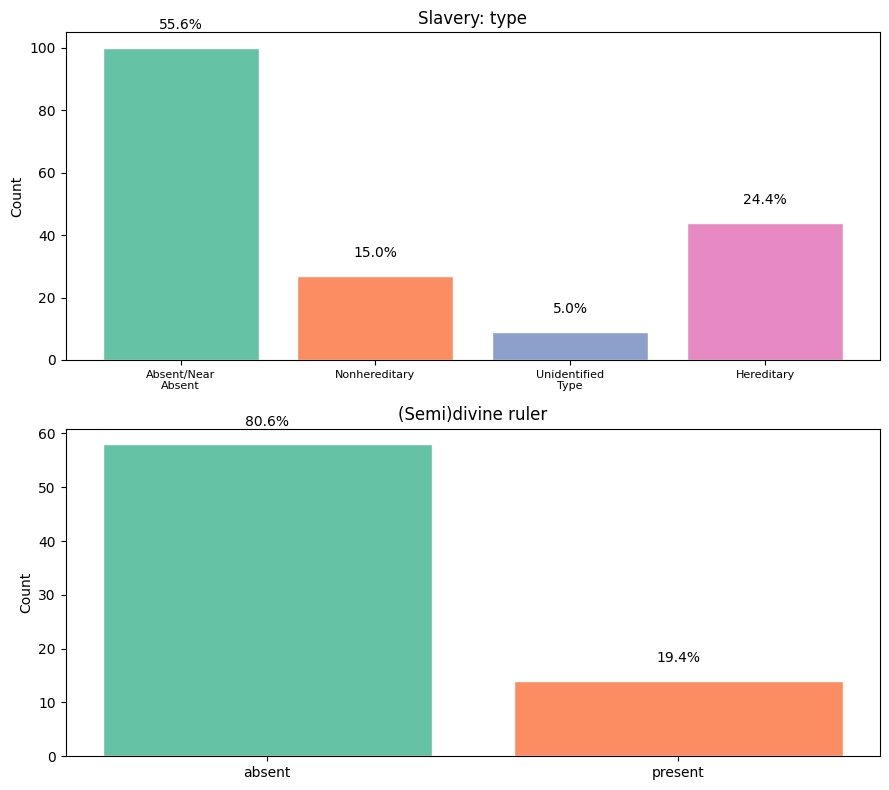

In [9]:

# Columns of interest
cols = ['Slavery: type', '(Semi)divine ruler']

# Count the frequency of each category
counts_slavery = d_wide[cols[0]].value_counts().sort_index()
counts_divine = d_wide[cols[1]].value_counts().sort_index()

labels_divine = {0: 'absent', 1: 'present'}

# Map numerical indices to descriptive labels
slavery_labelled = counts_slavery.index.map(labels_slavery)
divine_labelled = counts_divine.index.map(labels_divine)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 8))

# Bar chart for 'Slavery: type'
colors_slavery = sns.color_palette('Set2', len(counts_slavery))
axs[0].bar(slavery_labelled, counts_slavery.values, color=colors_slavery, edgecolor='white', linewidth=1)
axs[0].set_title('Slavery: type')
axs[0].set_ylabel('Count')

# Wrap the labels for better readability
wrapped_slavery_labels = ['\n'.join(textwrap.wrap(str(label), width=15)) for label in slavery_labelled]
axs[0].set_xticks(range(len(slavery_labelled)))
axs[0].set_xticklabels(wrapped_slavery_labels, fontsize=8)

# Add percentage labels on top of the bars
total_slavery = sum(counts_slavery.values)
percentages_slavery = [(count / total_slavery) * 100 for count in counts_slavery.values]
offset_slavery = 0.05 * max(counts_slavery.values)
for i, (count, percentage) in enumerate(zip(counts_slavery.values, percentages_slavery)):
    axs[0].text(i, count + offset_slavery, f'{percentage:.1f}%', ha='center', va='bottom')

# Bar chart for '(Semi)divine ruler'
colors_divine = sns.color_palette('Set2', len(counts_divine))
axs[1].bar(divine_labelled, counts_divine.values, color=colors_divine, edgecolor='white', linewidth=1)
axs[1].set_title('(Semi)divine ruler')
axs[1].set_ylabel('Count')

# Add percentage labels on top of the bars
total_divine = sum(counts_divine.values)
percentages_divine = [(count / total_divine) * 100 for count in counts_divine.values]
offset_divine = 0.05 * max(counts_divine.values)
for i, (count, percentage) in enumerate(zip(counts_divine.values, percentages_divine)):
    axs[1].text(i, count + offset_divine, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()


The bar chart below illustrates differences in the category distribution of the variable depicting the presence and type of slavery, based on whether a society views the ruler as (semi)divine.\
In societies where the ruler is considered divine, hereditary slavery is more prevalent, whereas in those where the ruler is not viewed as divine, the absence of slavery is the most common category. Note that significantly fewer observations are available for the slavery variable in societies where (semi)divine view of the ruler is present (n=6) than where it is absent (n=25). 

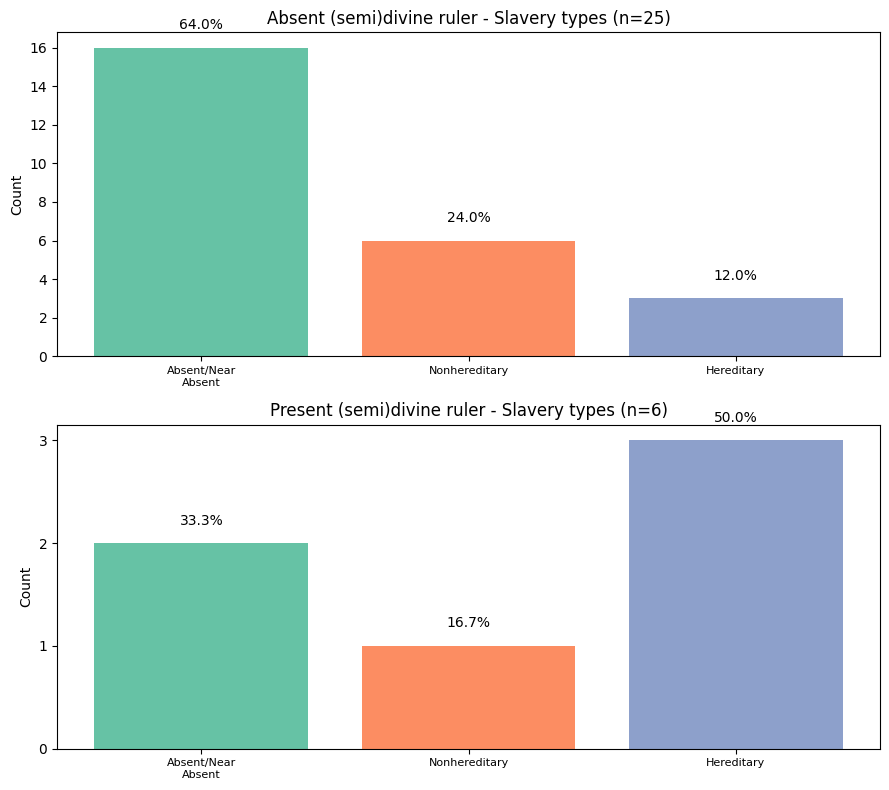

In [10]:
# Columns of interest
cols = ['Slavery: type', '(Semi)divine ruler']

# Split the data based on the (Semi)divine ruler column
divine_absent = d_wide[d_wide[cols[1]] == 0]
divine_present = d_wide[d_wide[cols[1]] == 1]

# Count the frequency of Slavery types for each subset
counts_slavery_absent = divine_absent[cols[0]].value_counts().sort_index()
counts_slavery_present = divine_present[cols[0]].value_counts().sort_index()

# Count total number of observations per (semi)divine ruler category
valid_data = d_wide.dropna(subset=[cols[0], cols[1]])
divine_absent = valid_data[valid_data[cols[1]] == 0]
divine_present = valid_data[valid_data[cols[1]] == 1]
n_absent = len(divine_absent)
n_present = len(divine_present)

# Map numerical indices to descriptive labels
slavery_labelled_absent = counts_slavery_absent.index.map(labels_slavery)
slavery_labelled_present = counts_slavery_present.index.map(labels_slavery)

# Create subplots & use integer formatter for y-axis (regardless of data range)
fig, axs = plt.subplots(2, 1, figsize=(9, 8))
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))

# Bar chart for (Semi)divine ruler ABSENT
colors_slavery = sns.color_palette('Set2', max(len(counts_slavery_absent), len(counts_slavery_present)))
axs[0].bar(slavery_labelled_absent, counts_slavery_absent.values, color=colors_slavery[:len(counts_slavery_absent)])
axs[0].set_title(f'Absent (semi)divine ruler - Slavery types (n={n_absent})')
axs[0].set_ylabel('Count')

# Wrap the labels for better readability
wrapped_slavery_labels_absent = ['\n'.join(textwrap.wrap(str(label), width=15)) for label in slavery_labelled_absent]
axs[0].set_xticks(range(len(slavery_labelled_absent)))
axs[0].set_xticklabels(wrapped_slavery_labels_absent, fontsize=8, ha='center')

# Add percentage labels on top of the bars
total_slavery_absent = sum(counts_slavery_absent.values)
percentages_slavery_absent = [(count / total_slavery_absent) * 100 for count in counts_slavery_absent.values]
offset_slavery_absent = 0.05 * max(counts_slavery_absent.values) if len(counts_slavery_absent) > 0 else 0
for i, (count, percentage) in enumerate(zip(counts_slavery_absent.values, percentages_slavery_absent)):
    axs[0].text(i, count + offset_slavery_absent, f'{percentage:.1f}%', ha='center', va='bottom')

# Bar chart for (Semi)divine ruler PRESENT
axs[1].bar(slavery_labelled_present, counts_slavery_present.values, color=colors_slavery[:len(counts_slavery_present)])
axs[1].set_title(f'Present (semi)divine ruler - Slavery types (n={n_present})')
axs[1].set_ylabel('Count')

# Wrap the labels for better readability
wrapped_slavery_labels_present = ['\n'.join(textwrap.wrap(str(label), width=15)) for label in slavery_labelled_present]
axs[1].set_xticks(range(len(slavery_labelled_present)))
axs[1].set_xticklabels(wrapped_slavery_labels_present, fontsize=8, ha='center')

# Add percentage labels on top of the bars
total_slavery_present = sum(counts_slavery_present.values)
percentages_slavery_present = [(count / total_slavery_present) * 100 for count in counts_slavery_present.values]
offset_slavery_present = 0.05 * max(counts_slavery_present.values) if len(counts_slavery_present) > 0 else 0
for i, (count, percentage) in enumerate(zip(counts_slavery_present.values, percentages_slavery_present)):
    axs[1].text(i, count + offset_slavery_present, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()

# **Data Analysis and Results**

To test hypotheses 1 and 3, an independent samples t-test (or its non-parametric counterpart) is conducted. For hypotheses 2 and 4, a one-way ANOVA (or its non-parametric equivalent) is performed. Additionally, a multiple linear regression model is used to assess whether the presence/type of slavery and the perception of the ruler as (semi)divine predict the indoctrination of specific childhood traits.

## *Slavery Type & Inculcated Traits*

To compare the distributions of the selected traits across different types of slavery in societies, the following boxplots were generated:

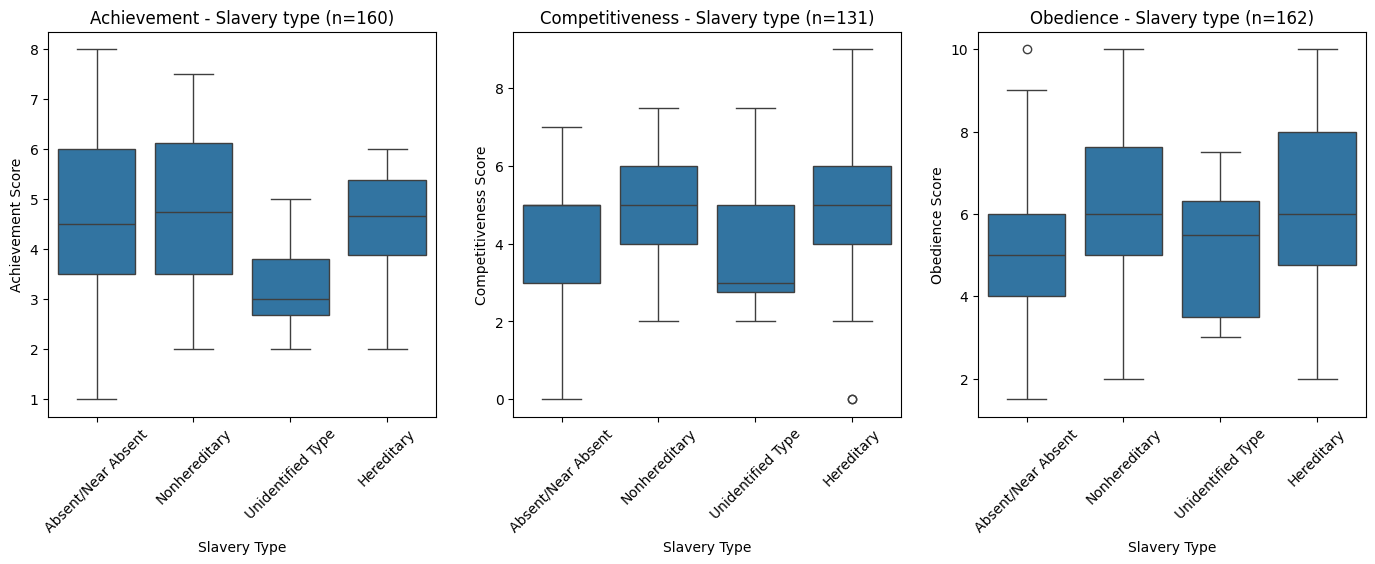

In [11]:
# Boxplots: Trait scores by slavery type
# Create boxplots for the relationship between slavery type and different traits
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

n_achievement = d_wide.dropna(subset=['Slavery: type', 'Achievement: Avg']).shape[0] # Number of valid trials for Achievement 
sns.boxplot(x='Slavery: type', y='Achievement: Avg', data=d_wide, ax=axs[0])
axs[0].set_title(f'Achievement - Slavery type (n={n_achievement})')
axs[0].set_ylabel('Achievement Score')
axs[0].set_xlabel('Slavery Type')
axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels([_ for _ in labels_slavery.values()], rotation=45);

n_competitiveness = d_wide.dropna(subset=['Slavery: type', 'Competitiveness: Avg']).shape[0] # Number of valid trials for Competitiveness 
sns.boxplot(x='Slavery: type', y='Competitiveness: Avg', data=d_wide, ax=axs[1])
axs[1].set_title(f'Competitiveness - Slavery type (n={n_competitiveness})')
axs[1].set_ylabel('Competitiveness Score')
axs[1].set_xlabel('Slavery Type')
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels([_ for _ in labels_slavery.values()], rotation=45)

n_obedience = d_wide.dropna(subset=['Slavery: type', 'Obedience: Avg']).shape[0] # Number of valid trials for Obedience 
sns.boxplot(x='Slavery: type', y='Obedience: Avg', data=d_wide, ax=axs[2])
axs[2].set_title(f'Obedience - Slavery type (n={n_obedience})')
axs[2].set_ylabel('Obedience Score')
axs[2].set_xlabel('Slavery Type')
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels([_ for _ in labels_slavery.values()], rotation=45);


To evaluate statistically significant differences in selected traits across societies with varying types of slavery, one-way ANOVA or Kruskal-Wallis tests were conducted (results below). Additionally, pre-registered planned contrast tests were performed to examine differences between specific societal groups (see separate block under ANOVA results).\
For each trait, one-way ANOVA assumptions were tested; if violated, the robust Kruskal-Wallis test was applied.\
\
**Achievement trait**: The hypothesis that achievement is less significant in societies with hereditary slavery was not supported. A Kruskal-Wallis test showed no significant differences across slavery types (H = 7.71, p = 0.05, ε² = 0.05). Planned contrasts confirmed no differences between no slavery (M = 4.60) vs. nonhereditary (M = 4.88; t = -0.80, p = 0.43) or nonhereditary vs. hereditary (M = 4.53; t = 0.97, p = 0.34).\
\
**Competitiveness trait**: The hypothesis that competitiveness is less significant in hereditary slavery societies was not supported. A Kruskal-Wallis test found no significant differences (H = 5.60, p = 0.13, ε² = 0.04). Planned contrasts showed no differences between no slavery (M = 4.13) vs. nonhereditary (M = 4.87; t = -1.92, p = 0.06) or nonhereditary vs. hereditary (M = 4.79; t = 0.18, p = 0.86).\
\
**Obedience trait**: The hypothesis that obedience is more significant in hereditary slavery societies showed a trend but was not statistically significant (ANOVA: F = 2.38, p = 0.07, η² = 0.04). Hereditary slavery societies had higher obedience scores (M = 6.03) than nonhereditary (M = 5.73; t = -0.55, p = 0.59) and no slavery (M = 5.10; t = -1.35, p = 0.19), but contrasts were not significant.\
\
No significant differences were found for achievement or competitiveness across slavery types. Obedience showed a non-significant trend toward greater emphasis in hereditary slavery societies.

In [12]:
# Trait Differences Across Slavery Types in Societies (One-Way ANOVA / Kruskal-Wallis Test)
traits = ['Achievement: Avg', 'Competitiveness: Avg', 'Obedience: Avg']
slavery_types = {
    0: 'Absent',
    1: 'Nonhereditary',
    2: 'Unidentified',
    3: 'Hereditary'
}

for trait in traits:
    print(f'\n-------------\nTest of differences in {trait.split(":")[0]} trait:')
    groups = [d_wide[d_wide['Slavery: type'] == i][trait].dropna() for i in range(1, 5)]

    # Descriptive statistics
    print('\nDescriptive statistics:')
    for i, group in enumerate(groups):
        print(f"Slavery type {i+1} ({slavery_types[i]}): n={len(group)}, Mean={group.mean():.4f}, Median={group.median():.4f}, SD={group.std():.4f}")

    # One-way ANOVA assumption checks
    use_kruskal = False
    variances = 'equal'

    # Check for normality of residuals
    model = ols(f'Q("{trait}") ~ C(Q("Slavery: type"))', data=d_wide).fit()
    residuals = model.resid
    statistic, p_value = sp.stats.shapiro(residuals)
    print(f"\nShapiro-Wilk test on residuals: statistic = {statistic:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print('Residuals are not normally distributed.')
        use_kruskal = True
    else:
        print('Residuals are normally distributed.')

    # Check for homogeneity of variances
    print('\nTest of homogeneity of variances:')
    levene_stat, levene_p = sp.stats.levene(*groups)
    print(f"Levene's test statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")

    if levene_p > 0.05:
        print('Variances are equal.')
    else:
        print('Variances are not equal.')
        variances = 'unequal'

    # One-way ANOVA / Kruskal-Wallis test for Achievement trait
    if not use_kruskal:
        f_stat, p_value = anova_oneway(groups, use_var=variances)
        print(f"\nOne-Way ANOVA{'' if variances == 'equal' else ' (with Welch correction)'}:" 
              f" F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

        # Calculate effect size (η²)
        total_n = sum(len(group) for group in groups)
        total_mean = np.mean([val for group in groups for val in group])
        ss_between = sum(len(group) * (np.mean(group) - total_mean) ** 2 for group in groups)
        ss_total = sum((val - total_mean) ** 2 for group in groups for val in group)
        eta_squared = ss_between / ss_total
        print(f'Effect size: η² = {eta_squared:.4f}')

    else:
        h_stat, p_value = sp.stats.kruskal(*groups)
        print(f"\nKruskal-Wallis: H-statistic = {h_stat:.4f}, p-value = {p_value:.4f}")

        # Calculate effect size (ε²)
        total_n = sum(len(group) for group in groups)
        epsion_squared = h_stat / (total_n - 1)
        print(f'Effect size: ε² = {epsion_squared:.4f}')


-------------
Test of differences in Achievement trait:

Descriptive statistics:
Slavery type 1 (Absent): n=89, Mean=4.5918, Median=4.5000, SD=1.5606
Slavery type 2 (Nonhereditary): n=24, Mean=4.8785, Median=4.7500, SD=1.5544
Slavery type 3 (Unidentified): n=8, Mean=3.3125, Median=3.0000, SD=1.0586
Slavery type 4 (Hereditary): n=39, Mean=4.5256, Median=4.6667, SD=1.0916

Shapiro-Wilk test on residuals: statistic = 0.9823, p-value = 0.0386
Residuals are not normally distributed.

Test of homogeneity of variances:
Levene's test statistic = 4.2465, p-value = 0.0065
Variances are not equal.

Kruskal-Wallis: H-statistic = 7.7062, p-value = 0.0525
Effect size: ε² = 0.0485

-------------
Test of differences in Competitiveness trait:

Descriptive statistics:
Slavery type 1 (Absent): n=71, Mean=4.1303, Median=5.0000, SD=1.6997
Slavery type 2 (Nonhereditary): n=19, Mean=4.8684, Median=5.0000, SD=1.4225
Slavery type 3 (Unidentified): n=7, Mean=4.0000, Median=3.0000, SD=1.9365
Slavery type 4 (Her

In [13]:
# Perform planned contrast tests
def perform_planned_contrasts(trait):
    print(f"\n-------------\nPlanned Contrasts for {trait.split(':')[0]}:")
    
    # Extract data for each slavery type
    type1_data = d_wide[d_wide['Slavery: type'] == 1.0][trait].dropna()
    type2_data = d_wide[d_wide['Slavery: type'] == 2.0][trait].dropna()
    type4_data = d_wide[d_wide['Slavery: type'] == 4.0][trait].dropna()
    
    # Contrast 1: Type 1 (Absent) vs Type 2 (Nonhereditary)
    print("\nType 1 (Absent) vs Type 2 (Nonhereditary):")
    if len(type1_data) > 0 and len(type2_data) > 0:
        t_stat, p_val = sp.stats.ttest_ind(type1_data, type2_data, equal_var=False)
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_val:.4f} ({'sig.' if p_val < 0.05 else 'not sig.'})")
        print(f"  Mean Type 1 (Absent): {type1_data.mean():.4f}, n={len(type1_data)}")
        print(f"  Mean Type 2 (Nonhereditary): {type2_data.mean():.4f}, n={len(type2_data)}")
    else:
        print("  Not enough data for this comparison")
    
    # Contrast 2: Type 2 (Nonhereditary) vs Type 4 (Hereditary)
    print("\nType 2 (Nonhereditary) vs Type 4 (Hereditary):")
    if len(type2_data) > 0 and len(type4_data) > 0:
        t_stat, p_val = sp.stats.ttest_ind(type2_data, type4_data, equal_var=False)
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_val:.4f} ({'sig.' if p_val < 0.05 else 'not sig.'})")
        print(f"  Mean Type 2 (Nonhereditary): {type2_data.mean():.4f}, n={len(type2_data)}")
        print(f"  Mean Type 4 (Hereditary): {type4_data.mean():.4f}, n={len(type4_data)}")
    else:
        print("  Not enough data for this comparison")

# Apply the contrasts to each trait
for trait in traits:
    perform_planned_contrasts(trait)


-------------
Planned Contrasts for Achievement:

Type 1 (Absent) vs Type 2 (Nonhereditary):
  t-statistic: -0.8013
  p-value: 0.4282 (not sig.)
  Mean Type 1 (Absent): 4.5918, n=89
  Mean Type 2 (Nonhereditary): 4.8785, n=24

Type 2 (Nonhereditary) vs Type 4 (Hereditary):
  t-statistic: 0.9740
  p-value: 0.3364 (not sig.)
  Mean Type 2 (Nonhereditary): 4.8785, n=24
  Mean Type 4 (Hereditary): 4.5256, n=39

-------------
Planned Contrasts for Competitiveness:

Type 1 (Absent) vs Type 2 (Nonhereditary):
  t-statistic: -1.9240
  p-value: 0.0630 (not sig.)
  Mean Type 1 (Absent): 4.1303, n=71
  Mean Type 2 (Nonhereditary): 4.8684, n=19

Type 2 (Nonhereditary) vs Type 4 (Hereditary):
  t-statistic: 0.1798
  p-value: 0.8581 (not sig.)
  Mean Type 2 (Nonhereditary): 4.8684, n=19
  Mean Type 4 (Hereditary): 4.7868, n=34

-------------
Planned Contrasts for Obedience:

Type 1 (Absent) vs Type 2 (Nonhereditary):
  t-statistic: -1.3472
  p-value: 0.1865 (not sig.)
  Mean Type 1 (Absent): 5.0994

## *Divineness of Ruler & Inculcated Traits*

To compare the distributions of scores between societies with divine and non-divine views of their ruler, see the following boxplots:

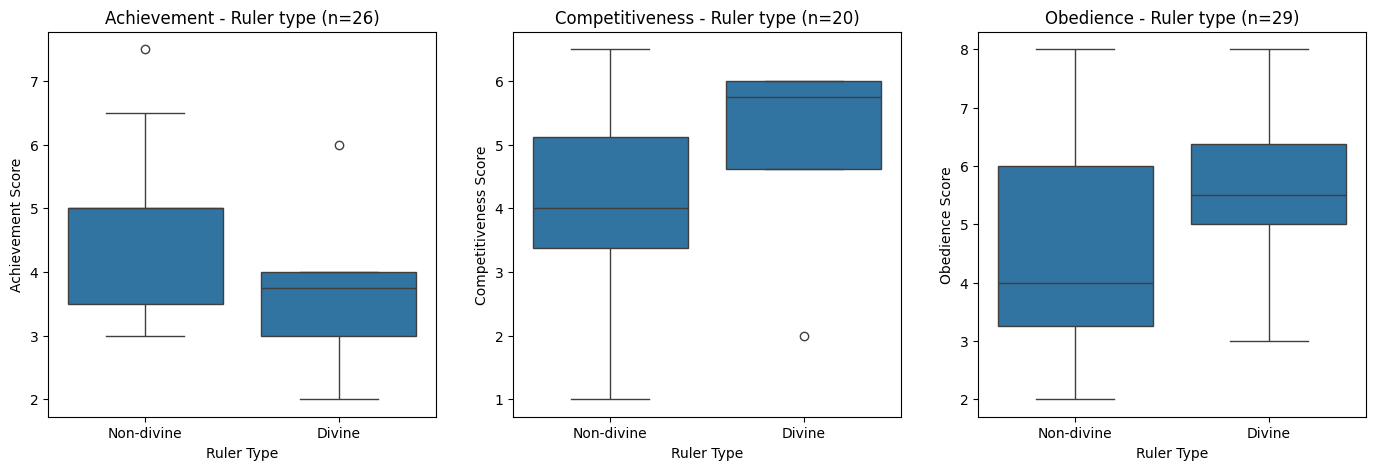

In [14]:
# Boxplots: trait scores by divineness of ruler
# X-tick labels
rulertype_ticks = ['Non-divine', 'Divine']

# Create boxplots for the relationship between slavery type and different traits
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

n_achievement = d_wide.dropna(subset=['(Semi)divine ruler', 'Achievement: Avg']).shape[0] # Number of valid trials for Achievement 
sns.boxplot(x='(Semi)divine ruler', y='Achievement: Avg', data=d_wide, ax=axs[0])
axs[0].set_title(f'Achievement - Ruler type (n={n_achievement})')
axs[0].set_ylabel('Achievement Score')
axs[0].set_xlabel('Ruler Type')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(rulertype_ticks)

n_competitiveness = d_wide.dropna(subset=['(Semi)divine ruler', 'Competitiveness: Avg']).shape[0] # Number of valid trials for Competitiveness 
sns.boxplot(x='(Semi)divine ruler', y='Competitiveness: Avg', data=d_wide, ax=axs[1])
axs[1].set_title(f'Competitiveness - Ruler type (n={n_competitiveness})')
axs[1].set_ylabel('Competitiveness Score')
axs[1].set_xlabel('Ruler Type')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(rulertype_ticks)

n_obedience = d_wide.dropna(subset=['(Semi)divine ruler', 'Obedience: Avg']).shape[0] # Number of valid trials for Obedience 
sns.boxplot(x='(Semi)divine ruler', y='Obedience: Avg', data=d_wide, ax=axs[2])
axs[2].set_title(f'Obedience - Ruler type (n={n_obedience})')
axs[2].set_ylabel('Obedience Score')
axs[2].set_xlabel('Ruler Type')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(rulertype_ticks);


To determine whether societies with divinely versus non-divinely viewed rulers differ significantly in selected traits, independent samples t-tests were conducted, or Mann-Whitney U tests were used if assumptions were not met.\
\
**Achievement trait**: The hypothesis that achievement is more important in non-divine ruler societies (M = 4.7024, SD = 1.2640) than divine ruler societies (M = 3.75, SD = 1.48) was not supported. An independent samples t-test (one-sided) showed no significant difference (t = 1.47, p = 0.08, Cohen's d = 0.73), though a moderate effect size suggests a trend toward higher achievement emphasis in non-divine societies.\
\
**Competitiveness trait**: The hypothesis that competitiveness is more important in non-divine ruler societies (M = 4.17, SD = 1.52) than divine ruler societies (M = 4.88, SD = 1.93) was not supported. A Mann-Whitney U test (one-sided) indicated no significant difference (U = 22.00, p = 0.84, r = -0.31). The negative effect size suggests a slight trend opposite to the hypothesis, with divine ruler societies showing higher competitiveness scores.\
\
**Obedience trait**: The hypothesis that obedience is more important in divine ruler societies (M = 5.58, SD = 1.69) than non-divine ruler societies (M = 4.51, SD = 1.82) was not supported. An independent samples t-test (one-sided) showed no significant difference (t = -1.30, p = 0.10, Cohen's d = -0.60). A moderate effect size indicates a trend toward greater obedience emphasis in divine ruler societies.\
\
No hypotheses were supported, as differences in achievement, competitiveness, and obedience between divine and non-divine ruler societies were not statistically significant. Larger sample sizes are needed to investigate trends shown in achievement and obedience traits.

In [15]:
# Trait Differences Across Ruler Types in Societies (Independent samples t-test / Mann-Whitney U test)
traits = ['Achievement: Avg', 'Competitiveness: Avg', 'Obedience: Avg']
ruler_types = {
    0: 'Non-divine',
    1: 'Divine'
}
directional_hypotheses = {
    'Achievement: Avg': 'greater',       # Group 0 > Group 1
    'Competitiveness: Avg': 'greater',   # Group 0 > Group 1
    'Obedience: Avg': 'less'             # Group 0 < Group 1
}

for trait in traits:
    print(f'\n-------------\nTest of differences in {trait.split(':')[0]} trait:')
    groups = [d_wide[d_wide['(Semi)divine ruler'] == i][trait].dropna() for i in range(0, 2)]

    # Get directional hypothesis for this trait
    alternative = directional_hypotheses[trait]
    print(f"Directional hypothesis: Non-divine ruler society scores {alternative} than divine ruler society.")

    # Descriptive statistics
    print('\nDescriptive statistics:')
    for i, group in enumerate(groups):
        print(f"Ruler type {i} ({ruler_types[i]}): n={len(group)}, Mean={group.mean():.4f}, Median={group.median():.4f}, SD={group.std():.4f}")

    # Test of normality
    p_values = []
    mann_whitney = False
    equal_variances = True
    print(f'\nTest of normal distribution:')
    for i in range(2):
        group_data = d_wide[d_wide['(Semi)divine ruler'] == i][trait].dropna()
        statistic, p_value = sp.stats.shapiro(group_data)
        print(f'Ruler type {i} ({ruler_types[i]}): Shapiro-Wilk statistic = {statistic:.4f}, p-value = {p_value:.4f}')
        p_values.append(p_value)
    
    if all(p > 0.05 for p in p_values):
        print('All variables are normally distributed.')
    else:
        print('At least one variable is not normally distributed.')
        mann_whitney = True
    
    # Test of homogeneity of variances
    print('\nTest of homogeneity of variances:')
    levene_stat, levene_p = sp.stats.levene(*groups)
    print(f"Levene's test statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")

    if levene_p > 0.05:
        print('Variances are equal.')
    else:
        print('Variances are not equal.')
        equal_variances = False
    
    print('\nResults:')
    if not mann_whitney:
        t_stat, p_value = sp.stats.ttest_ind(*groups, equal_var=equal_variances, alternative=alternative)
        print(f"Independent samples t-test (one-sided, {alternative}): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

        # Calculate effect size (Cohen's d)
        n1, n2 = len(groups[0]), len(groups[1])
        mean_diff = np.mean(groups[0]) - np.mean(groups[1])
        pooled_std = np.sqrt(((n1 - 1) * np.std(groups[0], ddof=1) ** 2 + (n2 - 1) * np.std(groups[1], ddof=1) ** 2) / (n1 + n2 - 2))
        cohen_d = mean_diff / pooled_std
        print(f'Effect size: Cohen\'s d = {cohen_d:.4f}')
    else:
        u_stat, p_value = sp.stats.mannwhitneyu(groups[0], groups[1], alternative=alternative)
        print(f"Mann-Whitney U test (one-sided, {alternative}): U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")

        # Calculate effect size (r)
        n1, n2 = len(groups[0]), len(groups[1])
        u1_stat = u_stat
        u2_stat = n1 * n2 - u1_stat
        r = (u1_stat - u2_stat) / (n1 * n2)
        print(f'Effect size: Rank-Biserial Correlation (r) = {r:.4f}')
    


-------------
Test of differences in Achievement trait:
Directional hypothesis: Non-divine ruler society scores greater than divine ruler society.

Descriptive statistics:
Ruler type 0 (Non-divine): n=21, Mean=4.7024, Median=5.0000, SD=1.2640
Ruler type 1 (Divine): n=5, Mean=3.7500, Median=3.7500, SD=1.4790

Test of normal distribution:
Ruler type 0 (Non-divine): Shapiro-Wilk statistic = 0.9327, p-value = 0.1560
Ruler type 1 (Divine): Shapiro-Wilk statistic = 0.9611, p-value = 0.8155
All variables are normally distributed.

Test of homogeneity of variances:
Levene's test statistic = 0.0069, p-value = 0.9347
Variances are equal.

Results:
Independent samples t-test (one-sided, greater): t-statistic = 1.4697, p-value = 0.0773
Effect size: Cohen's d = 0.7313

-------------
Test of differences in Competitiveness trait:
Directional hypothesis: Non-divine ruler society scores greater than divine ruler society.

Descriptive statistics:
Ruler type 0 (Non-divine): n=16, Mean=4.1719, Median=4.0

## *Linear Regression Model*

Linear regression models were used to examine the influence of slavery type and (semi)divine ruler presence on achievement, competitiveness, and obedience in child-rearing (for each trait).\
\
**Achievement trait**: The model (n = 26, Adjusted R² = 0.0304) showed no significant predictors of achievement (F = 1.2614, p = 0.3120). The (semi)divine ruler coefficient was negative (B = -1.0361, p = 0.1695), suggesting a trend toward lower achievement in divine ruler societies, but not significant. Slavery type coefficients were also non-significant (p > 0.2776). Potentially influential observations were noted (Cook’s Distance: 0.2021 > 0.1538).\
\
**Competitiveness trait**: The model (n = 20, Adjusted R² = 0.07) was not significant (F = 1.50, p = 0.25). No predictors significantly influenced competitiveness. The (semi)divine ruler coefficient (B = -0.31, p = 0.77) and slavery type coefficients (p = 0.08) showed no clear effects. Hereditary slavery had a positive trend (B = 1.80, p = 0.08). Influential observations were identified (Cook’s Distance: 0.35 > 0.20).\
\
**Obedience trait**: The model (n = 29, Adjusted R² = 0.16) approached significance (F = 2.74, p = 0.06). The (semi)divine ruler coefficient suggested higher obedience in divine ruler societies (B = 1.59, p = 0.07), nearly significant. Nonhereditary slavery showed a positive trend (B = 1.33, p = 0.09), while hereditary slavery was non-significant (β = -1.05, p = 0.23). Influential observations were noted (Cook’s Distance: 0.27 > 0.14).\
\
The models showed limited predictive power for achievement, competitiveness, and obedience. A trend toward lower achievement and higher obedience in (semi)divine ruler societies was observed but not significant. Slavery type had minimal impact, with slight trends for higher competitiveness (hereditary) and obedience (nonhereditary). Further research with larger samples is needed.


-------------
Linear regression model for Achievement trait:


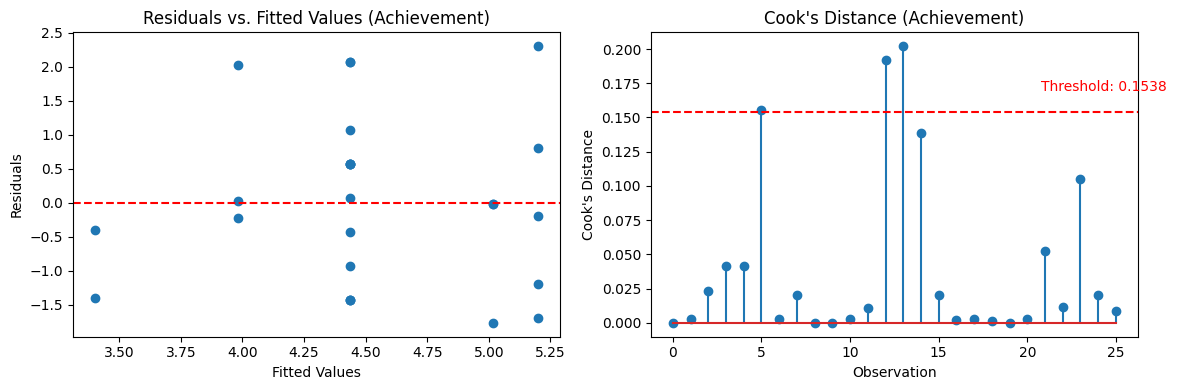


Max Cook's Distance: 0.2021
Cook's Distance threshold (4/n): 0.1538
Potentially influential observations: [ 5 12 13]

Shapiro-Wilk test on residuals: statistic = 0.9339, p-value = 0.0960
Residuals are normally distributed.

=== Model Summary ===
Number of observations: 26
Adjusted R-squared: 0.0304

Parameters:
                                   Coefficient  P-value  CI Lower  CI Upper
Intercept                               4.4381   0.0000    3.7074    5.1689
C(Q("Slavery: type"))[T.2.0]            0.7619   0.2776   -0.6573    2.1811
C(Q("Slavery: type"))[T.3.0]           -0.0000   0.3864   -0.0000    0.0000
C(Q("Slavery: type"))[T.4.0]            0.5799   0.4082   -0.8465    2.0062
C(Q("(Semi)divine ruler"))[T.1.0]      -1.0361   0.1695   -2.5490    0.4768

Model Statistics:
F-statistic: 1.2614
P-value (F-statistic): 0.3120
AIC: 91.5515
BIC: 96.5839

-------------
Linear regression model for Competitiveness trait:


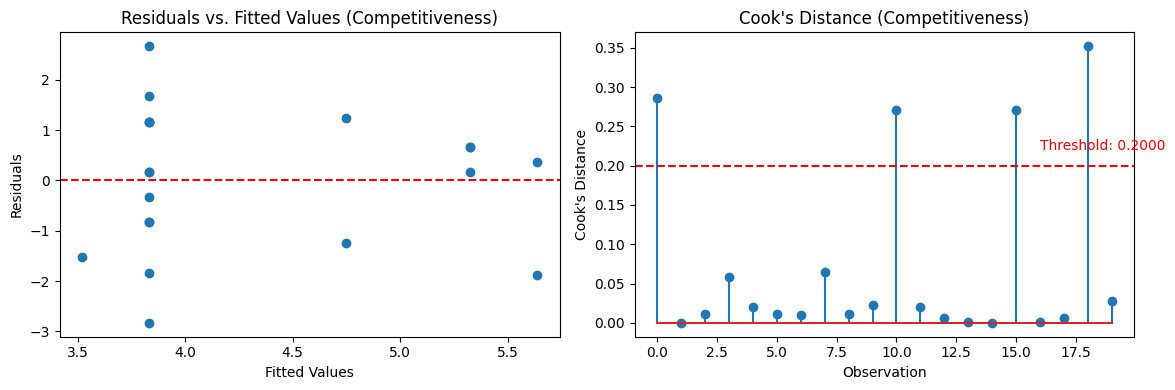


Max Cook's Distance: 0.3520
Cook's Distance threshold (4/n): 0.2000
Potentially influential observations: [ 0 10 15 18]

Shapiro-Wilk test on residuals: statistic = 0.9742, p-value = 0.8406
Residuals are normally distributed.

=== Model Summary ===
Number of observations: 20
Adjusted R-squared: 0.0725

Parameters:
                                   Coefficient  P-value  CI Lower  CI Upper
Intercept                               3.8315   0.0000    2.9215    4.7416
C(Q("Slavery: type"))[T.2.0]            0.9185   0.4392   -1.5357    3.3727
C(Q("Slavery: type"))[T.3.0]           -0.0000   0.3176   -0.0000    0.0000
C(Q("Slavery: type"))[T.4.0]            1.8043   0.0809   -0.2490    3.8577
C(Q("(Semi)divine ruler"))[T.1.0]      -0.3098   0.7704   -2.5220    1.9024

Model Statistics:
F-statistic: 1.4950
P-value (F-statistic): 0.2538
AIC: 77.0561
BIC: 81.0390

-------------
Linear regression model for Obedience trait:


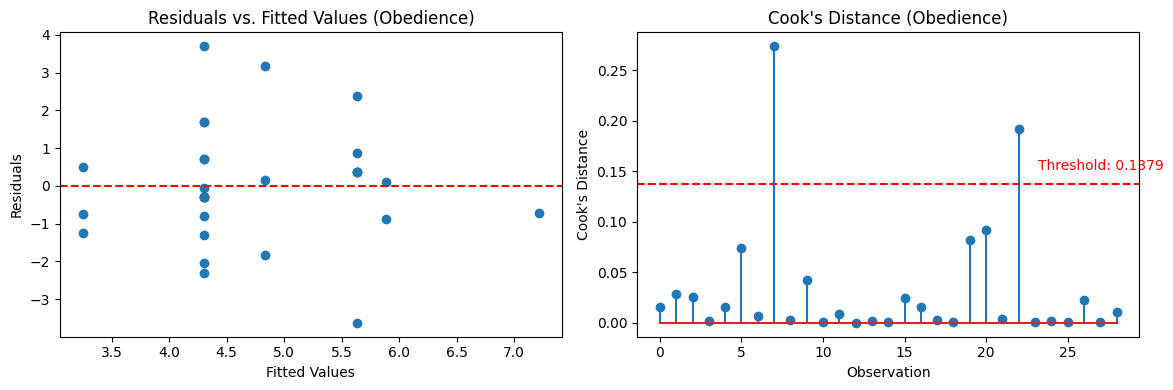


Max Cook's Distance: 0.2740
Cook's Distance threshold (4/n): 0.1379
Potentially influential observations: [ 7 22]

Shapiro-Wilk test on residuals: statistic = 0.9750, p-value = 0.7012
Residuals are normally distributed.

=== Model Summary ===
Number of observations: 29
Adjusted R-squared: 0.1572

Parameters:
                                   Coefficient  P-value  CI Lower  CI Upper
Intercept                               4.3016   0.0000    3.4162    5.1871
C(Q("Slavery: type"))[T.2.0]            1.3288   0.0913   -0.2298    2.8874
C(Q("Slavery: type"))[T.3.0]            0.0000   0.0357    0.0000    0.0000
C(Q("Slavery: type"))[T.4.0]           -1.0534   0.2304   -2.8183    0.7114
C(Q("(Semi)divine ruler"))[T.1.0]       1.5870   0.0655   -0.1098    3.2837

Model Statistics:
F-statistic: 2.7414
P-value (F-statistic): 0.0644
AIC: 115.7248
BIC: 121.1940


In [16]:
# Create a linear regression model: slavery type, ruler divineness -> inculcated traits
traits = ['Achievement: Avg', 'Competitiveness: Avg', 'Obedience: Avg']
for trait in traits:
    model = smf.ols(f'Q("{trait}") ~ C(Q("Slavery: type")) + C(Q("(Semi)divine ruler"))', data=d_wide).fit() # Dummy coding for input variables
    print(f'\n-------------\nLinear regression model for {trait.split(':')[0]} trait:')

    # Assumption checks: independent observations, linearity (input variables are categorical), homoscedasticity, influential observations, normality of residuals
    # Plots: homoscedasticity, cook's distance
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # 1. Homoscedasticity (Residuals vs. Fitted)
    axes[0].scatter(model.fittedvalues, model.resid)
    axes[0].axhline(0, color='red', linestyle='--')
    axes[0].set_xlabel('Fitted Values')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title(f'Residuals vs. Fitted Values ({trait.split(':')[0]})')
    
    # 2. Cook's Distance for influential observations
    influence = model.get_influence()
    cooks = influence.cooks_distance[0]
    axes[1].stem(cooks)
    axes[1].set_xlabel('Observation')
    axes[1].set_ylabel("Cook's Distance")
    axes[1].set_title(f"Cook's Distance ({trait.split(':')[0]})")
    
    # Add a horizontal line at Cook's distance = 4/n
    threshold = 4 / model.nobs
    axes[1].axhline(y=threshold, color='red', linestyle='--')
    axes[1].text(len(cooks)*0.8, threshold*1.1, f'Threshold: {threshold:.4f}', color='red')
    
    plt.tight_layout()
    plt.show()
    
    # Print max Cook's Distance value
    print(f"\nMax Cook's Distance: {np.max(cooks):.4f}")
    print(f"Cook's Distance threshold (4/n): {threshold:.4f}")
    
    # Report influential observations
    influential = np.where(cooks > threshold)[0]
    if len(influential) > 0:
        print(f"Potentially influential observations: {influential}")

    # 3. Normality of residuals
    residuals = model.resid
    statistic, p_value = sp.stats.shapiro(residuals)
    print(f"\nShapiro-Wilk test on residuals: statistic = {statistic:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print('Residuals are not normally distributed.')
        use_kruskal = True
    else:
        print('Residuals are normally distributed.')

    # Model summary
    # Number of observations
    print("\n=== Model Summary ===")
    print(f"Number of observations: {int(model.nobs)}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

    # Create a DataFrame with parameters, p-values, and confidence intervals
    pd.set_option('display.float_format', '{:.4f}'.format)
    conf_int = model.conf_int()
    results_df = pd.DataFrame({
        'Coefficient': model.params,
        'P-value': model.pvalues,
        'CI Lower': conf_int[0],
        'CI Upper': conf_int[1]
    })

    print("\nParameters:")
    print(results_df)

    # Additional model statistics
    print("\nModel Statistics:")
    print(f"F-statistic: {model.fvalue:.4f}")
    print(f"P-value (F-statistic): {model.f_pvalue:.4f}")
    print(f"AIC: {model.aic:.4f}")
    print(f"BIC: {model.bic:.4f}")

# **Conclusion**

The hypotheses that achievement and competitiveness are less significant, and obedience is more significant, in societies with hereditary slavery or (semi)divine rulers were not supported. No statistically significant differences were found across slavery types or ruler divinity for achievement or competitiveness, with only non-significant trends toward higher obedience in hereditary slavery and divine ruler societies. Linear regression showed minimal predictive power. Larger samples are needed to clarify these findings.

# **Variables**

Barry, H., Josephson, L., Lauer, E., & Marshall, C. (1976). *Traits inculcated in childhood: Cross-cultural codes 5. Ethnology, 15(1)*, 83-106.\
\
Carneiro, R. L. (2024). D-PLACE dataset derived from Robert L. Carneiro's Dataset (6th edition) (v3.1) [Data set]. *Zenodo*. https://doi.org/10.5281/zenodo.13325962\
\
Murdock, G. P., & White, D. R. (2024). D-PLACE dataset derived from Murdock and White 1969 'Standard Cross-Cultural Sample' (v3.1) [Data set]. *Zenodo*. https://doi.org/10.5281/zenodo.13318864